## Exploring Text Data

Working with text is generally more challenging than working with numerical data. Hence, any kind of technique that helps in generating an intuition of the existing dataset is welcome. One of the simplest approach to understand any text document or to compare multiple documents can be to compute a frequency table of individual words present in the document/documents and use it to conduct further experiements like: finding top words per document, finding top common words among documents etc.

In our case, we have taken the challenge of Analyzing Sentiments from Twitter data, so we will focus on how to generate word frequencies and use it to create **Word Clouds** in Python that will help us get a better overall understanding of the dataset.

**Note:-** We are using the same dataset from `tweets.csv` that we used earlier. You can get it [here.](https://studio.trainings.analyticsvidhya.com/assets/courseware/v1/aa0ae6514e0be95f11be85b84d4fd6d2/asset-v1:AnalyticsVidhya+NLP101+2018_T1+type@asset+block/tweets.csv)

### Table of Contents
1. About the Dataset
2. Generating Word Frequency
3. EDA using Word Clouds
4. Why to Preprocess text data?
5. Challenge

### 1. About the Dataset

The dataset that we are going to use is the same dataset of tweets from Twitter that will be used in module 8 for **Social Media Information Extraction**. You can download it from [here.](https://studio.trainings.analyticsvidhya.com/assets/courseware/v1/aa0ae6514e0be95f11be85b84d4fd6d2/asset-v1:AnalyticsVidhya+NLP101+2018_T1+type@asset+block/tweets.csv)
Let's load the dataset using pandas and have a quick look at some sample tweets. 

In [3]:
#Load the dataset
import pandas as pd 
url = 'https://raw.githubusercontent.com/SarahLares/introduction_to_NLP/master/tweets.csv'
dataset = pd.read_csv(url, encoding = 'ISO-8859-1')

dataset.head()

,Unnamed: 0,X,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted
0,1,1,RT @rssurjewala: Critical question: Was PayTM ...,False,0,NaN,2016-11-23 18:40:30,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",HASHTAGFARZIWAL,331,True,False
1,2,2,RT @Hemant_80: Did you vote on #Demonetization...,False,0,NaN,2016-11-23 18:40:29,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",PRAMODKAUSHIK9,66,True,False
2,3,3,"RT @roshankar: Former FinSec, RBI Dy Governor,...",False,0,NaN,2016-11-23 18:40:03,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",rahulja13034944,12,True,False
3,4,4,RT @ANI_news: Gurugram (Haryana): Post office ...,False,0,NaN,2016-11-23 18:39:59,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",deeptiyvd,338,True,False
4,5,5,RT @satishacharya: Reddy Wedding! @mail_today ...,False,0,NaN,2016-11-23 18:39:39,False,NaN,8.014954e+17,NaN,"<a href=""http://cpimharyana.com"" rel=""nofollow...",CPIMBadli,120,True,False


In [4]:
dataset.columns

Index(['Unnamed: 0', 'X', 'text', 'favorited', 'favoriteCount', 'replyToSN',
       'created', 'truncated', 'replyToSID', 'id', 'replyToUID',
       'statusSource', 'screenName', 'retweetCount', 'isRetweet', 'retweeted'],
      dtype='object')

As can be seen above, **text** column is of interest to us as it contains the tweet. At this point, you don't have to worry about other columns as that will be handled in future modules. Let's go ahead and inspect some of the tweets.

### 2. Generating Word Frequency

Let's first generate a frequency table of all the words present in all the tweets combined.

In [11]:
def gen_freq(text):
    #Will store the list of words
    word_list = []

    #Loop over all the tweets and extract words into word_list
    for tw_words in text.split():
        word_list.extend(tw_words)

    #Create word frequencies using word_list
    word_freq = pd.Series(word_list).value_counts()

    #Print top 20 words
    word_freq[:20]
    
    return word_freq

word_freq = gen_freq(dataset.text.str)
word_freq

RT                11053
to                 7650
is                 5152
in                 4491
the                4331
                  ...  
Google/YouTube        1
@AndrogynyV:          1
Cashless.             1
Fires                 1
Jewish                1
Length: 19601, dtype: int64

### 3. EDA using Word Clouds

Now that you have succesfully created a frequency table, you can use that to create multiple **visualizations** in the form of word clouds. Sometimes, the quickest way to understand the context of the text data is using a word cloud of top 100-200 words. Let's see how to create that in Python.

**Note:-** You'll use the `WordCloud` library of Python. You can install it by - 

`pip install wordcloud`

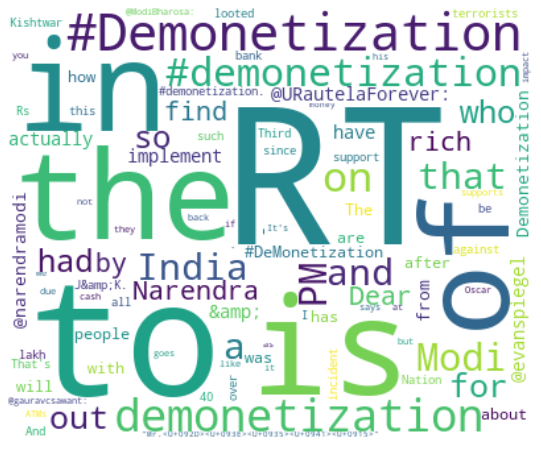

In [10]:
#Import libraries
import matplotlib.pyplot as plt
from wordcloud import WordCloud

#Generate word cloud
wc = WordCloud(width=400, height=330, max_words=100, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(12, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

**Few things to Note:-**

1. There is noise in the form of "RT" and "&amp" which can be removed from the word frequency.
2. Stop words like "the", "in", "to", "of" etc. are obviously ranking among the top frequency words but these are just constructs of the English language and are not specific to the people's tweets.
3. Words like "demonetization" have occured multiple times. The reason for this is that the current text is not **Normalized** so words like "demonetization", "Demonetization" etc. are all considered as different words.

The above are some of the problems that we need to address in order to make better visualization. Let's solve some of the problems!

#### Text Cleaning

You have already learnt how to utilize Regex to do text cleaning, that is precisely what we are doing here.

In [0]:
import re

def clean_text(text):
    #Remove RT
    text = re.sub(r'RT', '', text)
    
    #Fix &
    text = re.sub(r'&amp;', '&', text)
    
    #Remove punctuations
    text = re.sub(r'[?!.;:,#@-]', '', text)

    #Convert to lowercase to maintain consistency
    text = text.lower()
    return text

The above will solve problems related to RT, &amp and also the problem of counting same word twice due to case difference. Yet we can do better, let's remove the common stop words.


#### Stop words Removal
WordCloud provides its own stopwords list. You can have a look at it by- 


In [13]:
#Import list of stopwards
from wordcloud import STOPWORDS

print(STOPWORDS)

{'ours', "when's", "who's", 'again', 'ourselves', 'they', "we'd", 'over', 'could', 'having', 'than', 'for', 'would', "i'll", "wasn't", 'then', 'with', 'out', 'did', 'other', 'does', 'http', "shan't", "here's", 'she', "she's", 'the', 'while', "you'd", 'when', 'against', "how's", "you're", 'too', "i'm", "that's", 'to', 'been', 'was', "doesn't", 'themselves', 'which', 'me', "they'll", 'do', 'here', 'and', 'can', 'myself', "aren't", 'am', 'both', 'any', 'himself', 'itself', 'before', 'theirs', 'or', 'of', 'has', 'otherwise', 'through', "where's", 'yourself', 'herself', "we'll", "what's", 'below', 'same', 'above', 'i', 'what', 'it', "hadn't", 'nor', 'why', 'have', 'that', 'be', 'from', 'on', 'where', 'only', 'as', 'into', 'up', 'cannot', 'we', "she'll", "shouldn't", "they're", 'however', 'her', 'down', "don't", "you've", "won't", "it's", 'his', 'about', 'he', "mustn't", "couldn't", 'during', "i'd", "didn't", "they'd", 'after', 'my', "can't", 'who', 'between', 'further', "let's", 'our', "the

Now that you know what all has to be changed to improve our word cloud, let's make some wordclouds. We'll call the previous functions of `clean_text()` and `gen_freq()` to perform cleaning and frequency computation operation respectively and drop the words present in `STOPWORDS` from the `word_freq` dictionary.

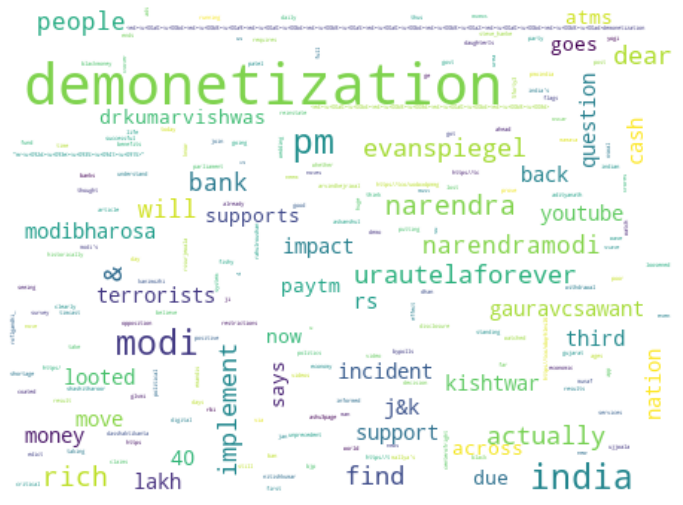

In [14]:
text = dataset.text.apply(lambda x: clean_text(x))
word_freq = gen_freq(text.str)*100
word_freq = word_freq.drop(labels=STOPWORDS, errors='ignore')

#Generate word cloud
wc = WordCloud(width=450, height=330, max_words=200, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(12, 14))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [18]:
word_freq.head(60)

demonetization                                                                                                                                                                    1387200
india                                                                                                                                                                              275200
modi                                                                                                                                                                               274800
pm                                                                                                                                                                                 272900
narendra                                                                                                                                                                           156600
rich                                                                  

Now that you have succesfully created a wordcloud, you can get some insight into the areas of interest of the general twitter users:

 - It is evident that people are talking about govt. policies like **demonetization**, **J&K**. 
 - There are some personalitites that are mentioned numerous times like **evanspiegel**, **PM Narendra Modi**, **Dr Kumar Vishwas** etc.
 - There are also talks about **oscars**, **youtube** and **terrorists**
 - There are many sub-topics that revolve around demonetization like **atms**, **bank**, **cash**, **paytm** etc. Which tells that many people are concerned about it.
 
### 4. Why to Preprocess text data?

As you may have already seen that without performing preprocessing operations like cleaning, removing stopwords and changing case in the dataset the representation always comes out wrong. In this case, it was that the wordcloud was full of noise but in other cases it might be your Machine Learning model that is going to suffer.

Also something to note is even now some words are misreperesented for example: **modi**, **narendra** and **narendramodi** all refer to the same person. This can eaisly be solved by **Normalizing** our text which is a technique that you'll learn in future models.

### 5. Challenge

As you would have noticed, even the current word cloud has some form of noise especially from strange symbols like `<U...>`. It's your task to go ahead and figure out how to deal with the, given the fact that they are present in word cloud implies that noise is widely present in the data.

In [0]:
def clean_text_2(text):
    #Remove RT
    text = re.sub(r'RT', '', text)
    
    #Fix &
    text = re.sub(r'&amp;', '&', text)
    
    #Remove punctuations
    text = re.sub(r'[?!.;:,#@-]', '', text)

    #Remove <u ..> 
    text = re.sub(r"[\w]+<.*" ,' ',text)

    #Remove links
    text = re.sub(r'https*[\r\n]*', '', text, flags=re.MULTILINE)

    #Remove \\
    text = re.sub(r"\\[\w].*" ,' ',text)
    #Remove //
    text = re.sub(r"//[\w].*" ,' ',text)
    #Remove ""
    text = re.sub(r"\".*" ,' ',text)
    #Convert to lowercase to maintain consistency
    text = text.lower()

    return text

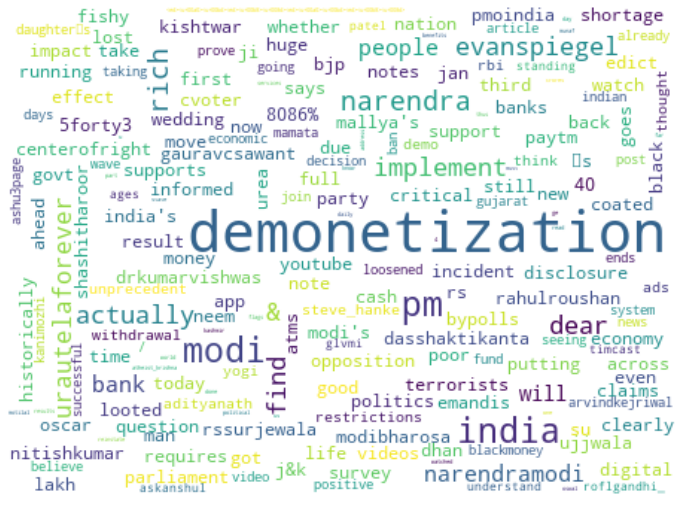

In [73]:
text = dataset.text.apply(lambda x: clean_text_2(x))
word_freq = gen_freq(text.str)*100
word_freq = word_freq.drop(labels=STOPWORDS, errors='ignore')

#Generate word cloud
wc = WordCloud(width=450, height=330, max_words=200, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(12, 14))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [74]:
word_freq.head(60)

demonetization     1350600
modi                273400
pm                  270300
india               268000
narendra            156600
rich                150700
find                142000
dear                141000
implement           139700
evanspiegel         138800
actually            137200
urautelaforever     127300
&                   123500
narendramodi        115500
people              108300
bank                102800
will                 94800
rs                   73800
impact               69100
lakh                 68500
support              67300
terrorists           65800
j&k                  63800
cash                 62100
nation               58400
third                55200
looted               54700
incident             54700
kishtwar             54400
move                 54300
modibharosa          54200
40                   54200
gauravcsawant        54100
youtube              52600
question             50300
back                 49800
money                48800
a